# Introduction to Data Science 2022

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="background-color: #ccfff2"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in Moodle.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle, and complete the following exercises. You will need to create a Kaggle account unless you already have one, but it is quite straightforward. 

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data. 

    <span style="background-color: #ccfff2"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="background-color: #ccfff2"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Use this cell for the code
df = pd.read_csv('train.csv',delimiter = ',')
df.shape


(891, 12)

In [3]:
#df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="background-color: #ccfff2"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="background-color: #ccfff2"> *Hint: The shape of the data should now be (891, 9).*</span>

In [4]:
# Use this cell for your code
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace = True)


In [5]:
df.shape

(891, 9)

3. The column <span style="background-color: #ccfff2">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="background-color: #ccfff2">*Cabin*</span>-column.

<span style="background-color: #ccfff2">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [6]:
# Use this cell for your code
df['Deck Letter'] = df['Cabin'].str.slice(0,1)
df
        

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked  \
0           0       3    male  22.0      1      0   7.2500   NaN        S   
1           1       1  female  38.0      1      0  71.2833   C85        C   
2           1       3  female  26.0      0      0   7.9250   NaN        S   
3           1       1  female  35.0      1      0  53.1000  C123        S   
4           0       3    male  35.0      0      0   8.0500   NaN        S   
..        ...     ...     ...   ...    ...    ...      ...   ...      ...   
886         0       2    male  27.0      0      0  13.0000   NaN        S   
887         1       1  female  19.0      0      0  30.0000   B42        S   
888         0       3  female   NaN      1      2  23.4500   NaN        S   
889         1       1    male  26.0      0      0  30.0000  C148        C   
890         0       3    male  32.0      0      0   7.7500   NaN        Q   

    Deck Letter  
0           NaN  
1             C  
2           NaN  
3             C  
4           NaN  
..          ...  
886         NaN  
887           B  
888         NaN  
889           C  
890         NaN  

[891 rows x 10 columns]

In [7]:
df.drop(columns=['Cabin'],inplace= True)


4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="background-color: #ccfff2">*Hint: Pandas can do this for you.*</span>

In [8]:
# Use this cell for your code
default_label = np.nan

df['Deck Letter'] = df['Deck Letter'].replace("", default_label)
df['Deck Letter'] = pd.factorize(df['Deck Letter'], sort= True)[0]
df['Sex'] = pd.factorize(df['Sex'], sort= True)[0]
df['Embarked'] = pd.factorize(df['Embarked'], sort= True)[0]

df

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Deck Letter
0           0       3    1  22.0      1      0   7.2500         2           -1
1           1       1    0  38.0      1      0  71.2833         0            2
2           1       3    0  26.0      0      0   7.9250         2           -1
3           1       1    0  35.0      1      0  53.1000         2            2
4           0       3    1  35.0      0      0   8.0500         2           -1
..        ...     ...  ...   ...    ...    ...      ...       ...          ...
886         0       2    1  27.0      0      0  13.0000         2           -1
887         1       1    0  19.0      0      0  30.0000         2            1
888         0       3    0   NaN      1      2  23.4500         2           -1
889         1       1    1  26.0      0      0  30.0000         0            2
890         0       3    1  32.0      0      0   7.7500         1           -1

[891 rows x 9 columns]

In [9]:
#print(df['Deck Letter'].unique())



5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="background-color: #ccfff2">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical.*</span>

In [10]:
#df.isna()

In [11]:
df['Deck Letter'] = df['Deck Letter'].fillna(df['Deck Letter'].mode()[0])
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

mean_value=df['Age'].mean()
df['Age'].fillna(value=mean_value, inplace=True)

mean_value=df['Fare'].mean()
df['Fare'].fillna(value=mean_value, inplace=True)


In [12]:
#df.isnull().sum()

6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="background-color: #ccfff2"> .csv</span> file. Then, write another file, this time in <span style="background-color: #ccfff2">JSON</span> format, with the following structure:

In [13]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [14]:
# Use this cell for your code
import json
df.to_csv('titanic.csv', sep='\t')

df.to_json('TitanicData.json',orient= 'records')

In [15]:
data = pd.read_json('TitanicData.json')
print(data)

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  \
0           0       3    1  22.000000      1      0   7.2500         2   
1           1       1    0  38.000000      1      0  71.2833         0   
2           1       3    0  26.000000      0      0   7.9250         2   
3           1       1    0  35.000000      1      0  53.1000         2   
4           0       3    1  35.000000      0      0   8.0500         2   
..        ...     ...  ...        ...    ...    ...      ...       ...   
886         0       2    1  27.000000      0      0  13.0000         2   
887         1       1    0  19.000000      0      0  30.0000         2   
888         0       3    0  29.699118      1      2  23.4500         2   
889         1       1    1  26.000000      0      0  30.0000         0   
890         0       3    1  32.000000      0      0   7.7500         1   

     Deck Letter  
0             -1  
1              2  
2             -1  
3              2  
4             -1

Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [16]:
# Use this cell for your code
print("survived ",df['Survived'].mode()[0])
print("Pclass ",df['Pclass'].mode()[0])
print("Sex ",df['Sex'].mode()[0])
print("Embarked", df['Embarked'].mode()[0])
print("Deck ",df['Deck Letter'].mode()[0])
print("Age", df['Age'].median())
print("SibSp", df['SibSp'].median())
print("Parch", df['Parch'].median())
print("Fare", df['Fare'].median())

print(df['Pclass'].mean())




survived  0
Pclass  3
Sex  1
Embarked 2
Deck  -1
Age 29.69911764705882
SibSp 0.0
Parch 0.0
Fare 14.4542
2.308641975308642


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="background-color: #ccfff2">*Hint 1: What are the average/most frequent variable values for a non-survivor?*</span>
    
    <span style="background-color: #ccfff2">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [17]:
df['people'] = np.where(df['Survived']== 1, True, False)
nonsurvivor = df[df['people'] == False]
survivor = df[df['people'] == True]

print("average survivor", survivor['Pclass'].mean())
print("average non-survivor", nonsurvivor['Pclass'].mean())

average survivor 1.9502923976608186
average non-survivor 2.5318761384335153


In [18]:
survivor.to_csv('survivor.csv', sep='\t')
nonsurvivor.to_csv('nonsurvivor.csv', sep='\t')

survivor.drop(columns= ['people'])


Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Deck Letter
1           1       1    0  38.0      1      0  71.2833         0            2
2           1       3    0  26.0      0      0   7.9250         2           -1
3           1       1    0  35.0      1      0  53.1000         2            2
8           1       3    0  27.0      0      2  11.1333         2           -1
9           1       2    0  14.0      1      0  30.0708         0           -1
..        ...     ...  ...   ...    ...    ...      ...       ...          ...
875         1       3    0  15.0      0      0   7.2250         0           -1
879         1       1    0  56.0      0      1  83.1583         0            2
880         1       2    0  25.0      0      1  26.0000         2           -1
887         1       1    0  19.0      0      0  30.0000         2            1
889         1       1    1  26.0      0      0  30.0000         0            2

[342 rows x 9 columns]

3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group? 

    <span style="background-color: #ccfff2">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

In [19]:
import pandas as pd
from ydata_profiling import ProfileReport
reportSurvivor = ProfileReport(survivor)
reportSurvivor

/Users/khadijatulkobra/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/khadijatulkobra/anaconda3/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
reportNonSurvivor = ProfileReport(nonsurvivor)
reportNonSurvivor

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="background-color: #ccfff2">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="background-color: #ccfff2">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

In [21]:
# Use this cell for your code
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

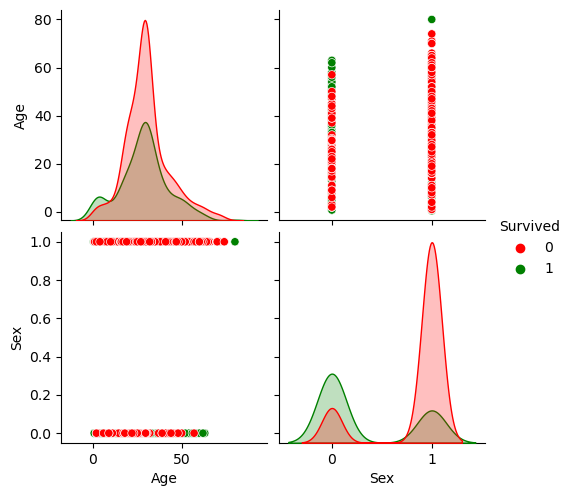

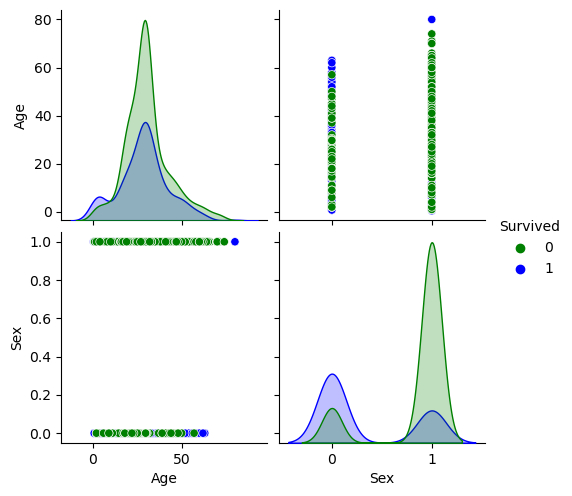

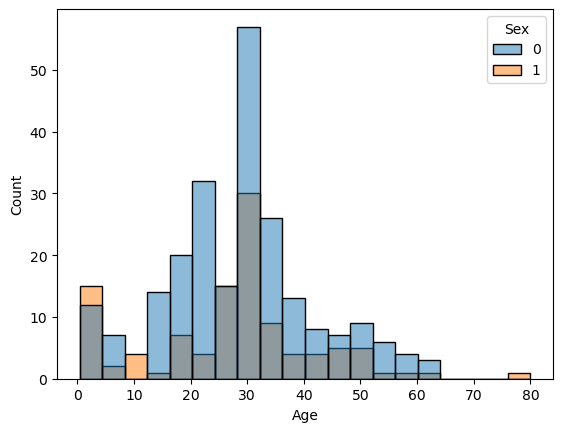

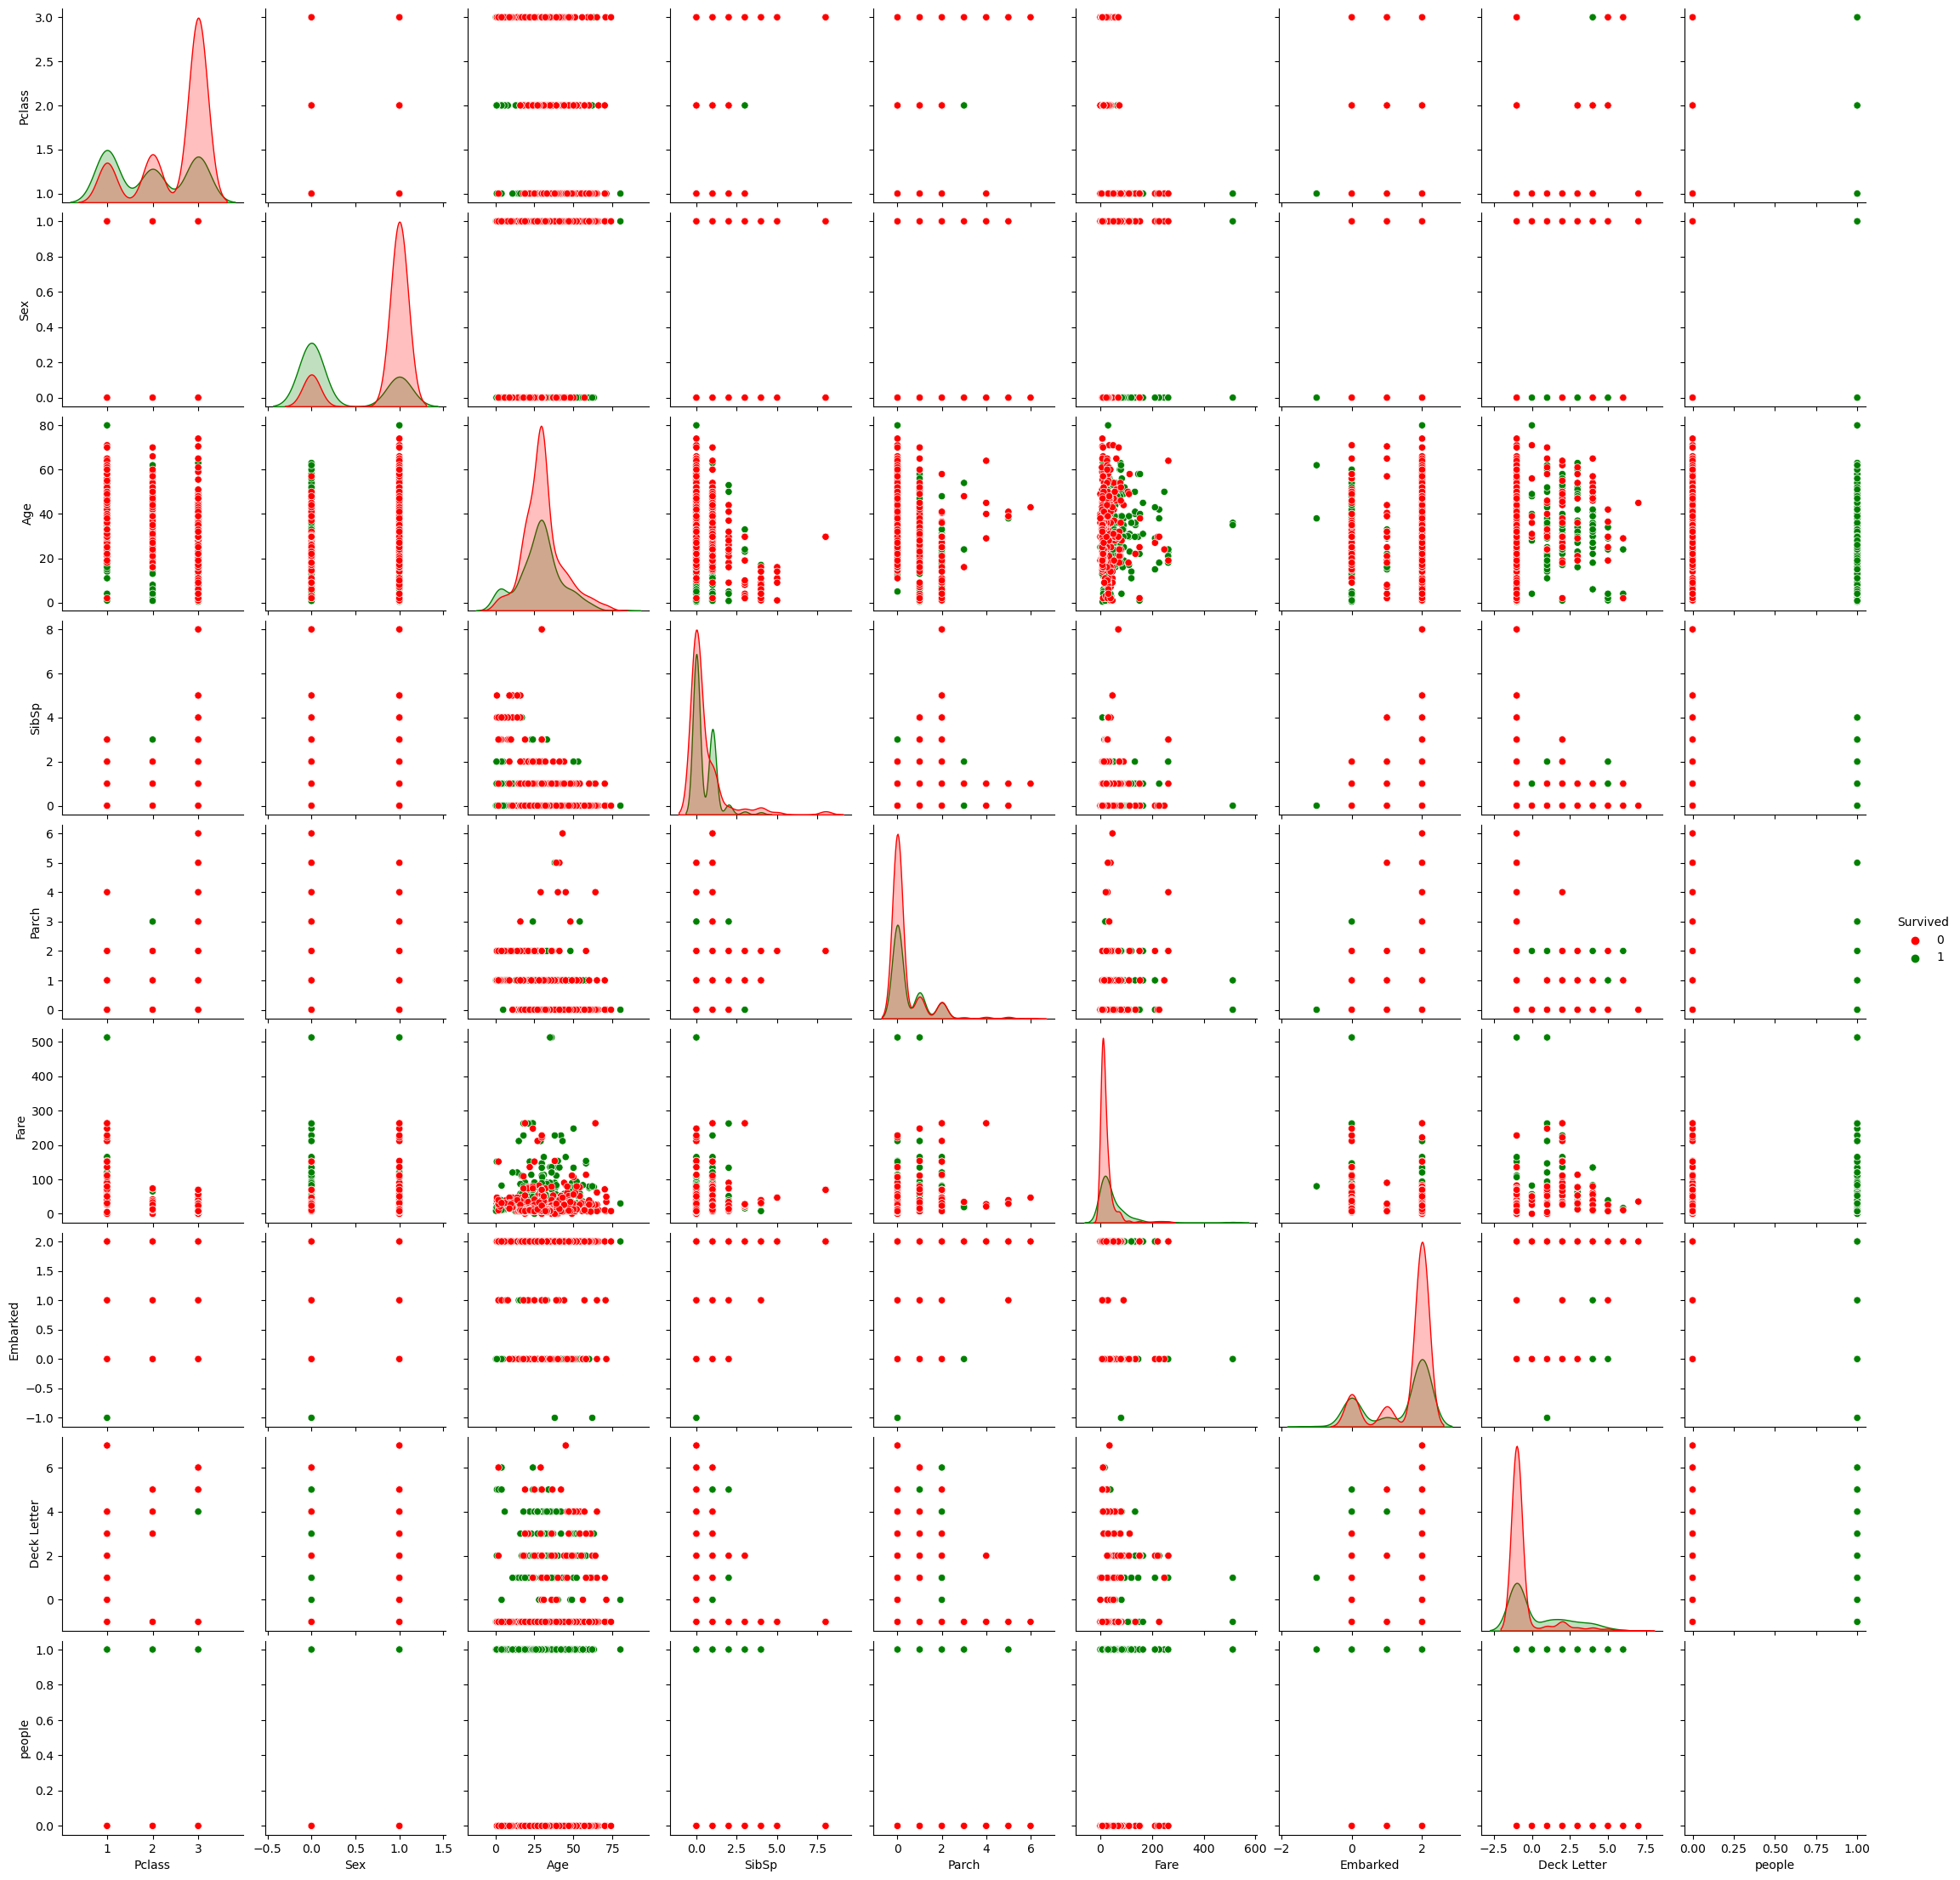

In [22]:
data = pd.concat([survivor,nonsurvivor])
paletteColor = {1:'g' , 0:'r'}
sns.pairplot(data = data, hue = 'Survived', palette = paletteColor, vars = ['Age', 'Sex'])
plt.show()

paletteColor = {1:'b' , 0:'g'}
sns.pairplot(data = data, hue = 'Survived', palette = paletteColor, vars = ['Age', 'Sex'])
plt.show()

sns.histplot(survivor, x="Age",hue="Sex")

paletteColor = {1:'g' , 0:'r'}
sns.pairplot(data = data, hue = 'Survived', palette = paletteColor)
plt.show()


5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

It was important to impute missing values, as removing them would have removed other important and relevant data. This would have effected to see the correct relationships between variables in both survivor and non-survivor group. And it also allows us to use the entire dataset for models.

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="background-color: #ccfff2">pos.txt</span> and <span style="background-color: #ccfff2">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on Moodle after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [23]:
from collections import Counter
import string

def preprocess_text(text):
    words = text.split()
    words = [word.strip(string.punctuation).lower() for word in words]
    
    return words

def most_common_words(filename, top):
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
    
    words = preprocess_text(text)
 
    word_freq = Counter(words)

    most_common_words = word_freq.most_common(top)
    
    return most_common_words

# Example usage
positive_common = most_common_words('pos.txt', top=15)
negative_common = most_common_words('neg.txt', top=15)

print("Most common words in positive file:")
print(positive_common)

print("\nMost common words in negative file:")
print(negative_common)

Most common words in positive file:
[('great', 435907), ('work', 427780), ('use', 345234), ('good', 291448), ('fit', 273505), ('instal', 229408), ('product', 210085), ('look', 181401), ('just', 180420), ('like', 175725), ('easi', 162864), ('light', 147322), ('car', 147195), ('price', 144891), ('need', 136519)]

Most common words in negative file:
[('work', 39998), ('use', 37244), ('fit', 31294), ('product', 24394), ('just', 23581), ('light', 22907), ('like', 20685), ('time', 19665), ('look', 18824), ('instal', 18709), ('did', 18447), ('good', 17295), ('dont', 17136), ('buy', 16885), ('car', 16694)]


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="background-color: #ccfff2">2 x m</span> matrix, where <span style="background-color: #ccfff2">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews (both positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="background-color: #ccfff2">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer

with open('pos.txt', 'r', encoding='utf-8') as filePos:
    textPos = filePos.read()

with open('neg.txt', 'r', encoding='utf-8') as fileNeg:
    textNeg = fileNeg.read()


vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform([textPos, textNeg])

# extracting feature names
tfidf_tokens = vectorizer.get_feature_names_out()
result = pd.DataFrame(data=vector.toarray(),  columns=tfidf_tokens)
result

00       000      0000     00000    000000  00000000  \
0  0.000372  0.000072  0.000045  0.000003  0.000002  0.000000   
1  0.000219  0.000174  0.000060  0.000008  0.000008  0.000011   

   000000000000000000058  000000000000002  00000000004   0000001  ...  \
0               0.000001         0.000001     0.000004  0.000002  ...   
1               0.000000         0.000000     0.000000  0.000000  ...   

     zzzzip         zzzzz  zzzzzooooo        zzzzzz   zzzzzzt   zzzzzzz  \
0  0.000001  8.414345e-07    0.000001  8.414345e-07  0.000000  0.000000   
1  0.000000  1.509088e-05    0.000000  7.545442e-06  0.000011  0.000011   

   zzzzzzzz  zzzzzzzzip  zzzzzzzzzzzzzz  zzzzzzzzzzzzzzzzzzzz  
0  0.000001    0.000001        0.000001              0.000002  
1  0.000000    0.000000        0.000000              0.000000  

[2 rows x 235581 columns]

3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [25]:
with open('pos.txt', 'r') as filePos:
    textPos = filePos.read()

with open('neg.txt', 'r') as fileNeg:
    textNeg = fileNeg.read()


vectorizerPos = TfidfVectorizer()
vectorPos = vectorizerPos.fit_transform([textPos])
tfidf_tokens_pos = vectorizerPos.get_feature_names_out()
resultPos = pd.DataFrame(data=vectorPos.toarray(),  columns=tfidf_tokens_pos)


vectorizerNeg = TfidfVectorizer()
vectorNeg = vectorizerNeg.fit_transform([textNeg])
tfidf_tokens_neg = vectorizerNeg.get_feature_names_out()
resultNeg = pd.DataFrame(data=vectorNeg.toarray(),  columns=tfidf_tokens_neg)


top = 10  
P = vectorPos.toarray()
N = vectorNeg.toarray()
positive_top_indices = P.argsort(axis=1)[:, -top:]
negative_top_indices = N.argsort(axis=1)[:, -top:]

# highest TF/IDF scores
highestPositive = [tfidf_tokens_pos[i] for i in positive_top_indices[0]]
highestNegative = [tfidf_tokens_neg[i] for i in negative_top_indices[0]]

print("Highest Positive Words:")
print(highestPositive)

print("\nHighest Negative Words:")
print(highestNegative)




Highest Positive Words:
['like', 'just', 'look', 'product', 'instal', 'fit', 'good', 'use', 'work', 'great']

Highest Negative Words:
['instal', 'look', 'time', 'like', 'light', 'just', 'product', 'fit', 'use', 'work']


4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset. 

    <span style="background-color: #ccfff2">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

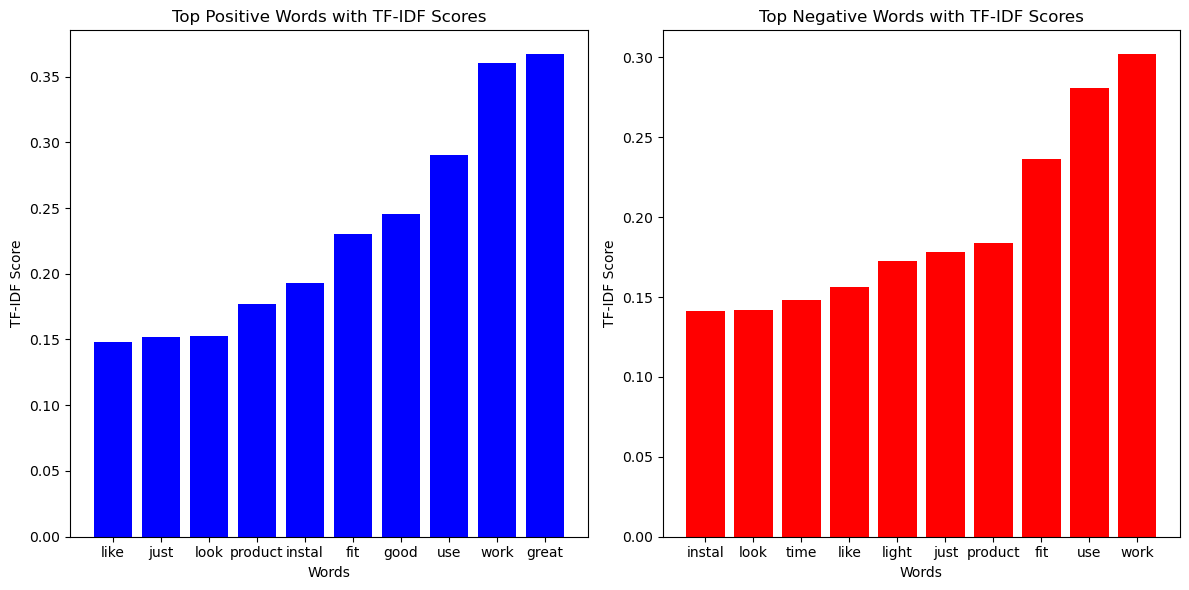

In [26]:

positive_values = [vectorPos[0, i] for i in positive_top_indices[0]]
negative_values = [vectorNeg[0, i] for i in negative_top_indices[0]]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(highestPositive, positive_values, color='blue')
plt.title('Top Positive Words with TF-IDF Scores')
plt.ylabel('TF-IDF Score')
plt.xlabel('Words')

plt.subplot(1, 2, 2)
plt.bar(highestNegative, negative_values, color='red')
plt.title('Top Negative Words with TF-IDF Scores')
plt.ylabel('TF-IDF Score')
plt.xlabel('Words')


plt.tight_layout()
plt.show()

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



**Submit a PDF with all the charts (the ones you found and the ones you produced).**